In [1]:
import sys
sys.path.append("../") # go to parent dir

In [2]:
FILENAME="f_phen"
GIT_USER_NAME="SEI-DO3SE"
GIT_REPO_NAME="do3se_phenology"
DEPENDENCIES=[
    ("thermal_time", "github.com/SEI-DO3SE/thermal_time.git"),
    ("do3se_phenology", "github.com/SEI-DO3SE/do3se_phenology.git"),
    ("do3se_met", "github.com/SEI-DO3SE/do3se_met.git"),
    ("notebook_utils", "github.com/sbland/notebook_utils.git"),
]

In [3]:
# Create colab link
from IPython.display import Markdown as md
md(f"""
<a href="https://colab.research.google.com/github/{GIT_USER_NAME}/{GIT_REPO_NAME}/blob/master/notebooks/{FILENAME}.ipynb" target="_parent">
    <img src="https://colab.research.google.com/assets/colab-badge.svg"/>
</a>
""")


<a href="https://colab.research.google.com/github/SEI-DO3SE/do3se_phenology/blob/master/notebooks/f_phen.ipynb" target="_parent">
    <img src="https://colab.research.google.com/assets/colab-badge.svg"/>
</a>


In [4]:
#@title Download libraries from github
#@markdown Code Hidden
try:
    import importlib
    for name, path in DEPENDENCIES:
        importlib.import_module(name)
except (ImportError, ModuleNotFoundError):
    if 'google.colab' in str(get_ipython()):
        print('Running on CoLab')
        print("""
        This notebook requires access to private repositories. To access follow the steps below:
        1. Get an access key from your github account: https://docs.github.com/en/github/authenticating-to-github/creating-a-personal-access-token
        2. Save the key to a file in the following location on your google drive: `My Drive/access/collabaccess.txt`. The file should include your user on the first line and your token on the second.
        """)
        from google.colab import drive
        drive.mount('/content/drive')

        !mkdir -p ~/.access
        !cp "/content/drive/My Drive/access/collabaccess.txt" ~/.access/config
        import os
        creds = open(f'{os.path.expanduser("~")}/.access/config')
        creds_parsed = creds.read().splitlines()
        user, token = creds_parsed
        for name, path in DEPENDENCIES:
            !pip install git+https://{user}:{token}@{path}
        creds.close()
        creds = None
        creds_parsed = None

In [5]:
import pandas as pd
from matplotlib import pyplot as plt
from collections import namedtuple
from dataclasses import dataclass
from typing import List
from itertools import accumulate
from notebook_utils import *


In [6]:
from do3se_phenology.f_phen import tt_leaf_f_phen_PLF_range, tt_f_phen_simple_PLF_range


# f_phen

Text(1845, 1.1, 't_f_phen_d')

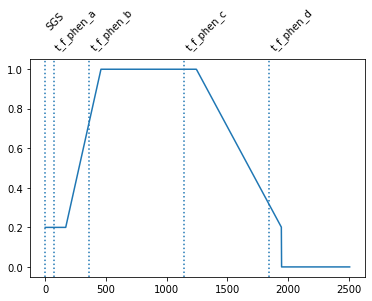

In [7]:
demo_temp_data = [2 for _ in range(1253)]
accumulated_temperatures = list(accumulate(demo_temp_data))

t_f_phen_a = 70
t_f_phen_b = 360
t_f_phen_c = 1145
t_f_phen_d = 1845
f_phen_min = 0.2
td_at_sgs=100
f_phen_data = tt_f_phen_simple_PLF_range(
    accumulated_temperatures,
    t_f_phen_a=t_f_phen_a,
    t_f_phen_b=t_f_phen_b,
    t_f_phen_c=t_f_phen_c,
    t_f_phen_d=t_f_phen_d,
    f_phen_min=f_phen_min,
    td_at_sgs=td_at_sgs,
)


plt.plot(accumulated_temperatures, f_phen_data)
plt.axvline(0, linestyle='dotted')
plt.axvline(t_f_phen_a, linestyle='dotted')
plt.axvline(t_f_phen_b, linestyle='dotted')
plt.axvline(t_f_phen_c, linestyle='dotted')
plt.axvline(t_f_phen_d, linestyle='dotted')
plt.text(0, 1.2, 'SGS', rotation=45)
plt.text(t_f_phen_a, 1.1, 't_f_phen_a', rotation=45)
plt.text(t_f_phen_b, 1.1, 't_f_phen_b', rotation=45)
plt.text(t_f_phen_c, 1.1, 't_f_phen_c', rotation=45)
plt.text(t_f_phen_d, 1.1, 't_f_phen_d', rotation=45)

# leaf f fphen

In [8]:
def plot_leaf_f_phen_data(
    accumulated_temperatures,
    leaf_f_phen_data,
    t_leaf_f_phen_a,
    t_leaf_f_phen_b,
    t_leaf_f_phen_e,
    t_leaf_f_phen_g,
    t_leaf_f_phen_h,
    t_leaf_f_phen_i,
    t_astart,
    td_at_sgs,
):
    offset = td_at_sgs + t_astart
    plt.plot(accumulated_temperatures, leaf_f_phen_data, color="red")
    plt.axvline(0, linestyle='dotted')
    plt.axvline(offset + t_leaf_f_phen_e, linestyle='dotted')
    plt.axvline(offset + t_leaf_f_phen_e + t_leaf_f_phen_g, linestyle='dotted')
    plt.axvline(offset + t_leaf_f_phen_e + t_leaf_f_phen_h, linestyle='dotted')
    plt.axvline(offset + t_leaf_f_phen_e + t_leaf_f_phen_i, linestyle='dotted')
    plt.axvline(offset, linestyle='dotted')
    plt.text(0, 1.2, 'SGS', rotation=45)
    plt.text(offset + t_leaf_f_phen_e, 1.1, 'Mid Anthesis(t_leaf_f_phen_e)', rotation=45)
    plt.text(offset + t_leaf_f_phen_e + t_leaf_f_phen_g, 1.1, 't_leaf_f_phen_g', rotation=45)
    plt.text(offset + t_leaf_f_phen_e + t_leaf_f_phen_h, 1.1, 't_leaf_f_phen_h', rotation=45)
    plt.text(offset + t_leaf_f_phen_e + t_leaf_f_phen_i, 1.1, 't_leaf_f_phen_i', rotation=45)
    plt.text(offset, 1.1, 't_astart', rotation=45)

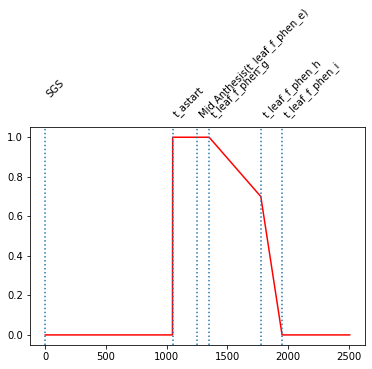

In [9]:


t_leaf_f_phen_a = 0.3
t_leaf_f_phen_b = 0.7
t_leaf_f_phen_e = 200
t_leaf_f_phen_g = 100
t_leaf_f_phen_h = 525
t_leaf_f_phen_i = 700
t_astart = 950
td_at_sgs=100
accumulated_temperatures = list(accumulate(demo_temp_data))

leaf_f_phen_data = tt_leaf_f_phen_PLF_range(
    accumulated_temperatures,
    t_leaf_f_phen_a=t_leaf_f_phen_a,
    t_leaf_f_phen_b=t_leaf_f_phen_b,
    t_leaf_f_phen_e=t_leaf_f_phen_e,
    t_leaf_f_phen_g=t_leaf_f_phen_g,
    t_leaf_f_phen_h=t_leaf_f_phen_h,
    t_leaf_f_phen_i=t_leaf_f_phen_i,
    t_astart=t_astart,
    td_at_sgs=td_at_sgs
)
plot_leaf_f_phen_data(
    accumulated_temperatures,
    leaf_f_phen_data,
    t_leaf_f_phen_a,
    t_leaf_f_phen_b,
    t_leaf_f_phen_e,
    t_leaf_f_phen_g,
    t_leaf_f_phen_h,
    t_leaf_f_phen_i,
    t_astart,
    td_at_sgs,
)
plt.show()

# Interactive versions 

In [10]:
#@title leaf_f_phen
accumulated_temperatures = list(accumulate(demo_temp_data))

@interact_plus_reset(
  t_leaf_f_phen_a=widgets.FloatSlider(min=0, max=1, value=0.3, step=0.1),
  t_leaf_f_phen_b=widgets.FloatSlider(min=0, max=1, value=0.7, step=0.1),
  t_leaf_f_phen_e=widgets.FloatSlider(min=1, max=2000, value=200, step=1),
  t_leaf_f_phen_g=widgets.FloatSlider(min=1, max=2000, value=100, step=1),
  t_leaf_f_phen_h=widgets.FloatSlider(min=1, max=2000, value=525, step=1),
  t_leaf_f_phen_i=widgets.FloatSlider(min=1, max=2000, value=700, step=1),
  t_f_phen_a=widgets.FloatSlider(min=1, max=2000, value=70, step=1),
  t_f_phen_b=widgets.FloatSlider(min=1, max=2000, value=360, step=1),
  t_f_phen_c=widgets.FloatSlider(min=1, max=2000, value=1145, step=1),
  t_f_phen_d=widgets.FloatSlider(min=1, max=2000, value=1845, step=1),
  f_phen_min=widgets.FloatSlider(min=0, max=1, value=0.2, step=0.1),
  t_astart=widgets.FloatSlider(min=1, max=2000, value=950, step=1),
  td_at_sgs=widgets.FloatSlider(min=1, max=2000, value=100, step=1),
)
def get_leaf_f_phen(
    t_leaf_f_phen_a,
    t_leaf_f_phen_b,
    t_leaf_f_phen_e,
    t_leaf_f_phen_g,
    t_leaf_f_phen_h,
    t_leaf_f_phen_i,
    t_f_phen_a,
    t_f_phen_b,
    t_f_phen_c,
    t_f_phen_d,
    f_phen_min,
    t_astart,
    td_at_sgs,
):
    leaf_f_phen_data = tt_leaf_f_phen_PLF_range(
        accumulated_temperatures,
        t_leaf_f_phen_a,
        t_leaf_f_phen_b,
        t_leaf_f_phen_e,
        t_leaf_f_phen_g,
        t_leaf_f_phen_h,
        t_leaf_f_phen_i,
        t_astart,
        td_at_sgs,
        )
        
    f_phen_data = tt_f_phen_simple_PLF_range(
        accumulated_temperatures,
        t_f_phen_a,
        t_f_phen_b,
        t_f_phen_c,
        t_f_phen_d,
        f_phen_min,
        td_at_sgs,
        )
    # plt.xlim(sowing_day - 5, sowing_day+120)

    plt.xlabel("thermal time")
    plt.ylabel("leaf_f_phen")
    
    plot_leaf_f_phen_data(
        accumulated_temperatures,
        leaf_f_phen_data,
        t_leaf_f_phen_a,
        t_leaf_f_phen_b,
        t_leaf_f_phen_e,
        t_leaf_f_phen_g,
        t_leaf_f_phen_h,
        t_leaf_f_phen_i,
        t_astart,
        td_at_sgs,
    )

    plt.plot(accumulated_temperatures, f_phen_data, label="f_phen")

    plt.show()

Button(description='Reset', style=ButtonStyle())

Output()